# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 09_Assignment_4.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=09_Assignment_4.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 09_Assignment_4.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [383]:
from __future__ import print_function, division
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn import linear_model, decomposition, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

%matplotlib inline

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 --- [0 marks] ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [384]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 --- [5 marks] ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [385]:
X.head(20)
#20 to see nonzero values

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
6,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
8,0.0,0.000000,0.000000,0.0,0.0,0.0,0.133553,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
9,0.0,0.420916,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [386]:
X.describe()

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,...,written,wrong,yankees,yeah,year,years,yes,york,young,zone
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,...,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,0.002436,0.002149,0.006709,0.001454,0.002286,0.003953,0.003115,0.000921,0.008366,0.001816,...,0.002612,0.006811,0.002470,0.003564,0.016934,0.008797,0.006381,0.002772,0.003288,0.001626
std,0.030224,0.020739,0.034631,0.023100,0.021634,0.030111,0.026958,0.016275,0.043921,0.026026,...,0.026988,0.039172,0.032786,0.031238,0.061181,0.039346,0.037319,0.025381,0.030929,0.022175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.723914,0.420916,0.431380,0.519765,0.443354,0.663808,0.572124,0.413233,1.000000,0.578282,...,0.723081,0.568146,0.878185,0.693531,0.650649,0.455493,0.646447,0.572455,0.703771,0.605576


In [387]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Columns: 1000 entries, abc to zone
dtypes: float64(1000)
memory usage: 21.7 MB


In [388]:
print(y[:20])

['rec.sport.baseball' 'rec.sport.baseball' 'rec.sport.hockey'
 'comp.sys.ibm.pc.hardware' 'rec.sport.baseball' 'alt.atheism'
 'comp.sys.mac.hardware' 'rec.sport.hockey' 'alt.atheism'
 'rec.sport.baseball' 'rec.sport.baseball' 'comp.sys.ibm.pc.hardware'
 'comp.sys.mac.hardware' 'alt.atheism' 'rec.sport.hockey' 'alt.atheism'
 'comp.sys.mac.hardware' 'comp.sys.ibm.pc.hardware' 'alt.atheism'
 'comp.sys.ibm.pc.hardware']


Each row of X is a document, and each column provides the tf-idf weight of the given feature or word in that document. Y is simply the newsgroup of each document. 

### ========== Question 1.2 --- [2 marks] ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [389]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

### ========== Question 1.3 --- [6 marks] ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [390]:
# Your code goes here
mean_distance = np.mean(np.linalg.norm(X-X.mean(), axis=1))
print("Mean of the Euclidean Distances", mean_distance)

print("Inertia", kmeans.inertia_)
print("Adjusted Rand Index", adjusted_rand_score(y, kmeans.labels_))

Mean of the Euclidean Distances 0.954584949852
Inertia 2593.14051971
Adjusted Rand Index 0.226658370508


1. Inertia is the sum of squared distance from a given point to its closest cluster center. A lower value (closer to 0) means a tighter clustered. Adjusted rand score is a measure similarity between two assignments, in our case actual vs predicted labels. It ignores actual values and only considers if they are equal. 
2. Our adjusted rand score is quite low. It is very close to randomly assigning a given class out of 5 total classes. Our high inertia means our clusters are very spread apart. 

### ========== Question 1.4 --- [3 marks] ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [391]:
print("Datapoints per Label:")
print(pd.value_counts(y))

print("\nDatapoints assigned to each Cluster:")
print(pd.value_counts(kmeans.labels_))

Datapoints per Label:
rec.sport.hockey            600
rec.sport.baseball          597
comp.sys.ibm.pc.hardware    590
comp.sys.mac.hardware       578
alt.atheism                 480
dtype: int64

Datapoints assigned to each Cluster:
0    1043
4     632
2     580
3     395
1     195
dtype: int64


The data points are fairly evenly distributed across each label, with a minor drop off in the alt.atheism documents. However, there is a strong bias towards cluster 0 and away from cluster 5. This wide variance in cluster size reinforces our poor Adjusted Rand Score, suggesting that K-means clustering is a poor fit for our model. 

### ========== Question 1.5 --- [3 marks] ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [392]:

centers= kmeans.cluster_centers_
distances = np.empty((5,5))
for i in xrange(5):
    for j in xrange(5):
        dist[i,j] = np.linalg.norm(centers[i]-centers[j])
        
dist

array([[ 0.        ,  0.3582088 ,  0.2084573 ,  0.21590554,  0.19450495],
       [ 0.3582088 ,  0.        ,  0.42242645,  0.40992251,  0.3388199 ],
       [ 0.2084573 ,  0.42242645,  0.        ,  0.27789057,  0.29672845],
       [ 0.21590554,  0.40992251,  0.27789057,  0.        ,  0.27712976],
       [ 0.19450495,  0.3388199 ,  0.29672845,  0.27712976,  0.        ]])

### ========== Question 1.6 --- [3 marks] ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

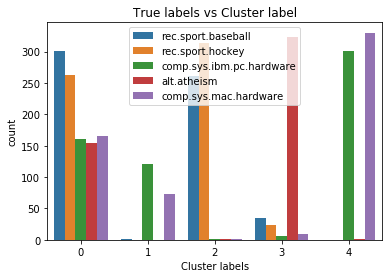

In [393]:
sns.countplot(x=kmeans.labels_, hue=y)

plt.title('True labels vs Cluster label')
plt.xlabel('Cluster labels')

Only cluster 3 has a clear trend towards a single label. Cluster 4 has only many of both pc and mac hardware labels, two easily confused classes. Cluster 1 has a similar but less pronounced bias towards the hardware documents. Clusters 0 and 2 both have more sports articles, but again none of the clusters aside from 3 have a clear single label association. This is a poor quality fit. 

### ========== Question 1.7 --- [8 marks] ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

In [394]:
n_components = [1,2,3,5,10,20,50,100,500,1000] 
scores = []

for d in n_components:
    pca = PCA(n_components=d)
    X_d = pca.fit_transform(X)
    kmeans.fit(X_d)
    print("\nd=", d)
    print("Inertia: ", kmeans.inertia_)
    print("Adjusted Rand Score: ", adjusted_rand_score(y, kmeans.labels_))
    scores.append(adjusted_rand_score(y, kmeans.labels_))


d= 1
Inertia:  2.82100010685
Adjusted Rand Score:  0.210955317474

d= 2
Inertia:  10.5674903514
Adjusted Rand Score:  0.271510151418

d= 3
Inertia:  20.4674991671
Adjusted Rand Score:  0.241888131886

d= 5
Inertia:  49.8487282258
Adjusted Rand Score:  0.227594393104

d= 10
Inertia:  117.71102942
Adjusted Rand Score:  0.219985650407

d= 20
Inertia:  230.560569576
Adjusted Rand Score:  0.21322809702

d= 50
Inertia:  488.368541948
Adjusted Rand Score:  0.214566122558

d= 100
Inertia:  801.256284287
Adjusted Rand Score:  0.21867642041

d= 500
Inertia:  2132.12688019
Adjusted Rand Score:  0.217487178664

d= 1000
Inertia:  2593.15360525
Adjusted Rand Score:  0.22719897741


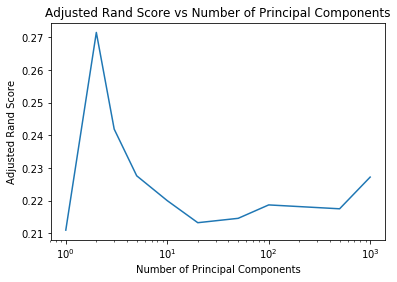

In [395]:
plt.plot(n_components, scores)
plt.xscale('log')

plt.title('Adjusted Rand Score vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Adjusted Rand Score')

1. Describe what it shows
    
    There is an initial increase in ARS with the increase in principal components, but diminishing returns are quickly reached. Our highest ARS is at around 2 components, after which our score falls drastically. 

2. Explain why we cannot use inertia to choose the best number of principal components

    Inertia increases with the number of principal components. Because Inertia is not normalized, we just know that lower is good and 0 is optimal. Higher dimensions lead to inflated Inertia values. This makes comparison difficult between numbers of components. 
    
3. Explain why dimensionality reduction could help k-means perform better
    
    Some dimensions can have low density, spread out clusters, especially with a high number of dimensions. PCA allows us to find a subspace with large variance of words, removing the effects of noisy words. This could give us more compact clusters to work with.

### ========== Question 1.8 --- [6 marks] ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

In [396]:
# Your code goes here
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

kmeans_pca =  KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(X_2d)
print("Adjusted Rand Score, 2d: ", adjusted_rand_score(y, kmeans_pca.labels_))

Adjusted Rand Score, 2d:  0.267448282426


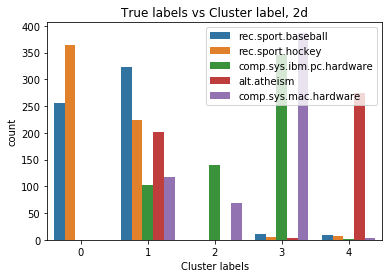

In [397]:
sns.countplot(x=kmeans_pca.labels_, hue=y)

plt.title('True labels vs Cluster label, 2d')
plt.xlabel('Cluster labels')

In [398]:
print("\nDatapoints assigned to each Cluster:")
print(pd.value_counts(kmeans_pca.labels_))


Datapoints assigned to each Cluster:
1    969
3    752
0    619
4    296
2    209
dtype: int64


As shown by our AR Score, this model gives us a slightly better performance. The distinction between the sports baseball and hockey are greater, which is good, however the distinction between pc and mac hardware labels are the abou the same as our previous clustering. The size of our clusters is more even, with 3 larger clusters instead of just one as before.

### ========== Question 1.9 --- [1 mark] ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [399]:
center_labels = ['rec.sport.hockey','rec.sport.baseball','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','alt.atheism']
labels_interp = np.array(center_labels)[kmeans_pca.labels_]

### ========== Question 1.10 --- [3 marks] ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

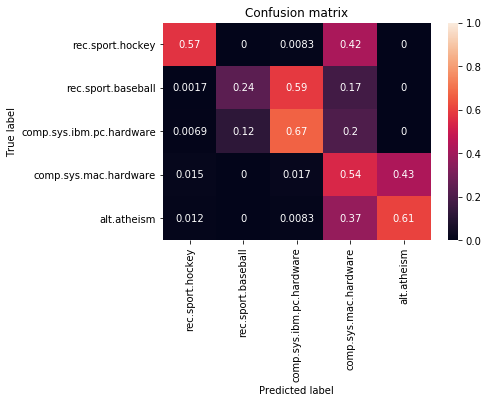

In [400]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y, labels_interp)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plot_confusion_matrix(cm_norm, classes=center_labels)

### ========== Question 1.11 --- [6 marks] ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

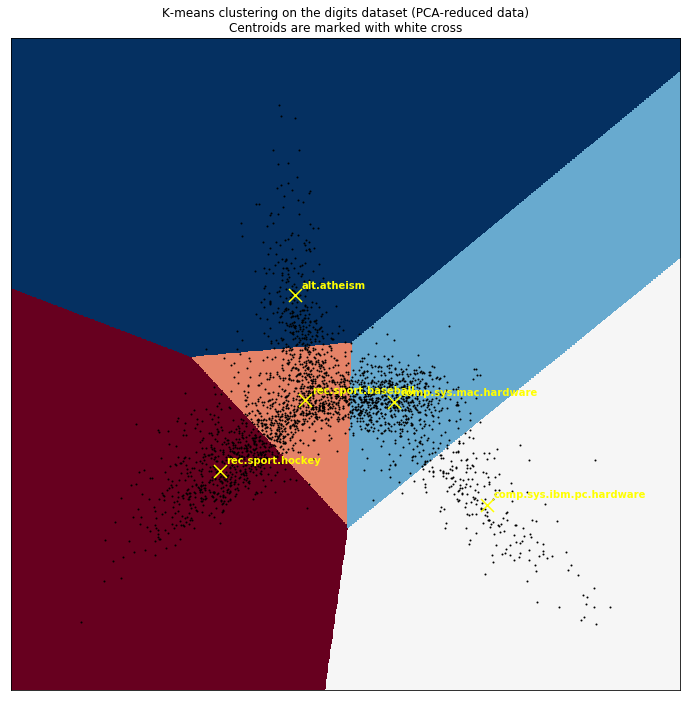

In [401]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - 0.1, X_2d[:, 0].max() + 0.1
y_min, y_max = X_2d[:, 1].min() - 0.1, X_2d[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.subplots(figsize=(12,12))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='RdBu',
           aspect='auto', origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)

# Plot the centroids as a yellow X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color=[1,1,0], zorder=10)

# Label the Centroids
for centroid, label in zip(centroids, center_labels): 
    plt.annotate(label, xy=centroid, xytext=(centroid[0]+.01,centroid[1]+.01), color = [1,1,0], weight = 1000)

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [402]:
true_labels = [center_labels.index(l) for l in y]

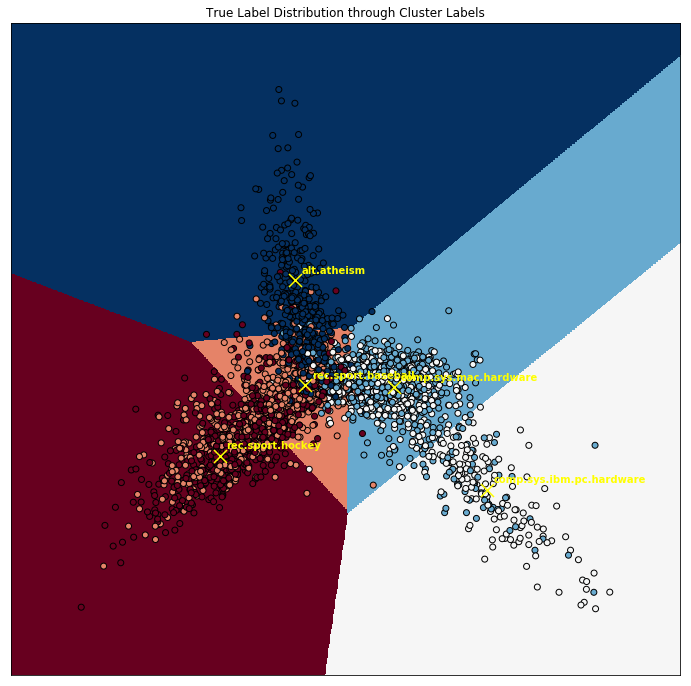

In [403]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - 0.1, X_2d[:, 0].max() + 0.1
y_min, y_max = X_2d[:, 1].min() - 0.1, X_2d[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.subplots(figsize=(12,12))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='RdBu',
           aspect='auto', origin='lower')


plt.scatter(X_2d[:, 0], X_2d[:, 1], c=true_labels, cmap='RdBu', edgecolors='k')

# Plot the centroids as a yellow X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color=[1,1,0], zorder=10)

# Label the Centroids
for centroid, label in zip(centroids, center_labels): 
    plt.annotate(label, xy=centroid, xytext=(centroid[0]+.01,centroid[1]+.01), color = [1,1,0], weight = 1000)

plt.title('True Label Distribution through Cluster Labels')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### ========== Question 1.12 --- [4 marks] ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

Is the kmeans algorithm deterministic?

No, kmeans is not deterministic. Based on a starting point, the algorithm converges to a local minimum, and a change in starting points will give you different results.

Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?

Yes, the algorithm in 1.2 does do multiple initialisations, usking kmeans++. The process of choosing centroids requires it. A point is first chosen uniformly at random as the first center. Subsequent centers are chosed using a weighted probability distribution.

The default method for initialising centres in the sklearn implementation is kmeans++. Name another method for initialising and a problem with it.

Random Initialisation is another method. However, different runs of Kmeans using Random Initialisations will create different sum squared errors. On a higher level, random initialisation should be the baseline to compare better methods.

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 --- [0 marks] ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [404]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 --- [8 marks] ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. What are the max/min values for each dimension?
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots, answer this question in a markdown cell:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [405]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [406]:
df = pd.DataFrame(digits['data'])
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [407]:
df.shape

(1797, 64)

In [408]:
for i in range(df.shape[1]):
    print("Dimension: {}  Max: {}  Min: {}".format(i, df.max(axis=0)[i], df.min(axis=0)[i]))

Dimension: 0  Max: 0.0  Min: 0.0
Dimension: 1  Max: 8.0  Min: 0.0
Dimension: 2  Max: 16.0  Min: 0.0
Dimension: 3  Max: 16.0  Min: 0.0
Dimension: 4  Max: 16.0  Min: 0.0
Dimension: 5  Max: 16.0  Min: 0.0
Dimension: 6  Max: 16.0  Min: 0.0
Dimension: 7  Max: 15.0  Min: 0.0
Dimension: 8  Max: 2.0  Min: 0.0
Dimension: 9  Max: 16.0  Min: 0.0
Dimension: 10  Max: 16.0  Min: 0.0
Dimension: 11  Max: 16.0  Min: 0.0
Dimension: 12  Max: 16.0  Min: 0.0
Dimension: 13  Max: 16.0  Min: 0.0
Dimension: 14  Max: 16.0  Min: 0.0
Dimension: 15  Max: 12.0  Min: 0.0
Dimension: 16  Max: 2.0  Min: 0.0
Dimension: 17  Max: 16.0  Min: 0.0
Dimension: 18  Max: 16.0  Min: 0.0
Dimension: 19  Max: 16.0  Min: 0.0
Dimension: 20  Max: 16.0  Min: 0.0
Dimension: 21  Max: 16.0  Min: 0.0
Dimension: 22  Max: 16.0  Min: 0.0
Dimension: 23  Max: 8.0  Min: 0.0
Dimension: 24  Max: 1.0  Min: 0.0
Dimension: 25  Max: 15.0  Min: 0.0
Dimension: 26  Max: 16.0  Min: 0.0
Dimension: 27  Max: 16.0  Min: 0.0
Dimension: 28  Max: 16.0  Min: 0.0
D

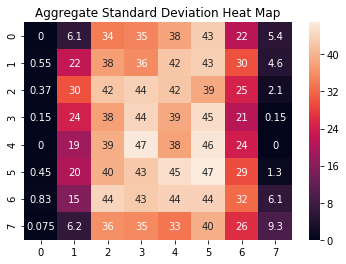

In [409]:
std = np.array(df.groupby(digits.target).std())
square_std = np.empty((10,8,8))

for i in xrange(10):
    square_std[i,:,:] = std[i].reshape(8,8)
    
#plotting Aggregate Standard Deviations
ax = sns.heatmap(np.sum(square_std, axis=0), annot=True)
ax.set_title("Aggregate Standard Deviation Heat Map")

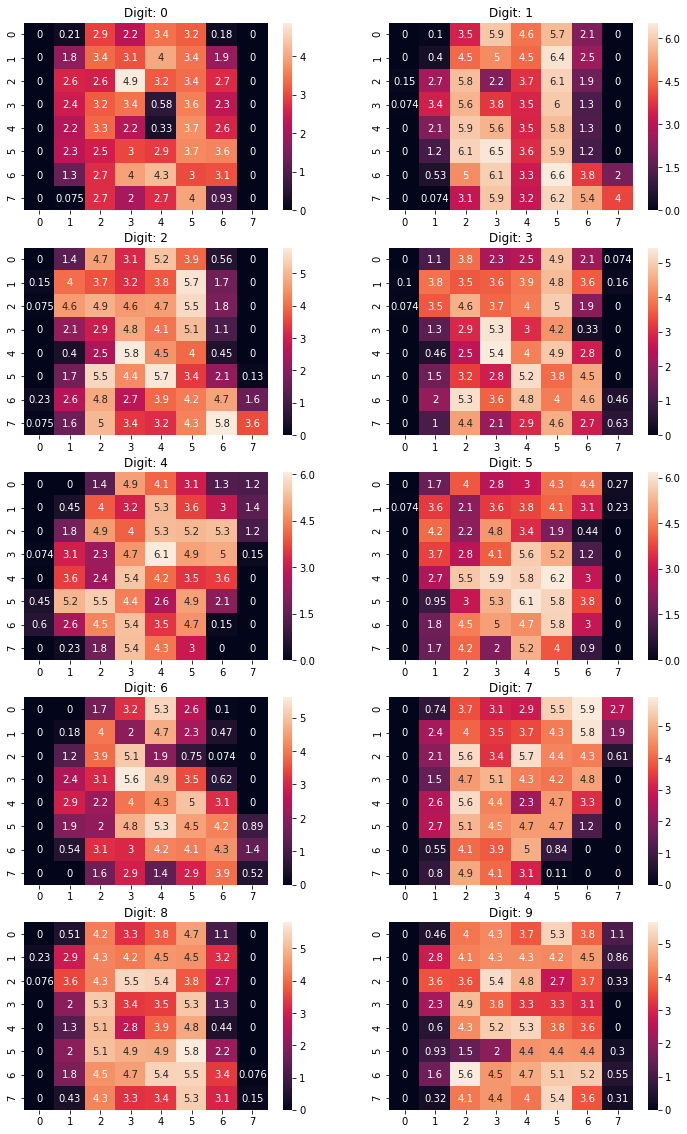

In [410]:
#Plotting Standard Deviations of each Digit
fig,axs = plt.subplots(5, 2, figsize=(12,20))
for ax,i in zip(axs.flat, range(10)):
    sns.heatmap(square_std[i], ax=ax, annot=True)
    ax.set_title("Digit: {}".format(i))

In [411]:
df[i]

#df.iloc[i]

0        0.0
1        0.0
2        0.0
3        8.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        2.0
10       0.0
11       0.0
12       0.0
13       4.0
14       0.0
15      11.0
16       0.0
17       3.0
18       0.0
19       0.0
20       0.0
21       0.0
22       1.0
23       3.0
24       0.0
25       3.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
1767     0.0
1768     0.0
1769     0.0
1770     4.0
1771     0.0
1772     4.0
1773     0.0
1774     0.0
1775     0.0
1776     3.0
1777     0.0
1778     0.0
1779     0.0
1780     7.0
1781     2.0
1782    10.0
1783     0.0
1784     0.0
1785     1.0
1786     5.0
1787     0.0
1788     0.0
1789     0.0
1790     0.0
1791     0.0
1792     1.0
1793     0.0
1794     0.0
1795     0.0
1796     2.0
Name: 9, Length: 1797, dtype: float64

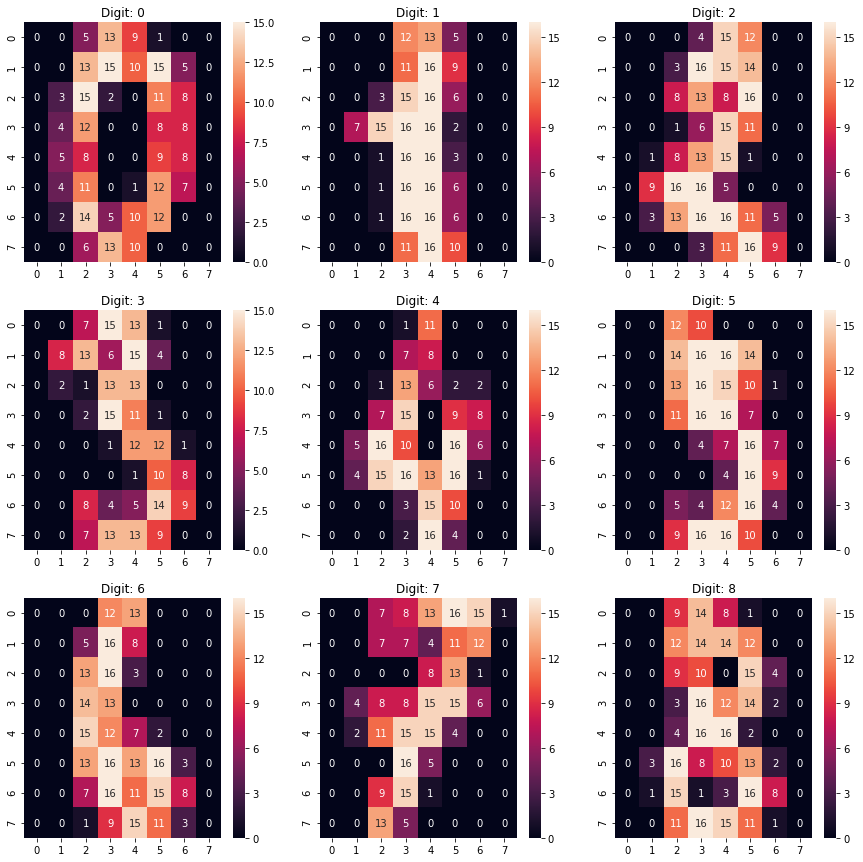

In [412]:
#Plotting each digit

square_digit= np.empty((9,8,8))

for i in xrange(9):
    square_std[i,:,:] = df.iloc[i].values.reshape((8,8))

fig,axs = plt.subplots(3, 3, figsize=(15,15))
for ax,i in zip(axs.flat, range(9)):
    sns.heatmap(square_std[i], ax=ax, annot=True)
    ax.set_title("Digit: {}".format(i))

Are all of the dimensions going to be equally helpful for modelling? Explain.

No, many of the left and right edges of the heatmaps are almost always 0 or close to 0, as shown. In an actual image of a digit this will be white space, and will likely not be useful to us. Similarly pixles towards the middle top and bottom are almost always used. On the other hand pixels in the center change quite a bit, and will likely be our most important features.

### ========== Question 2.2 --- [10 marks] ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

28


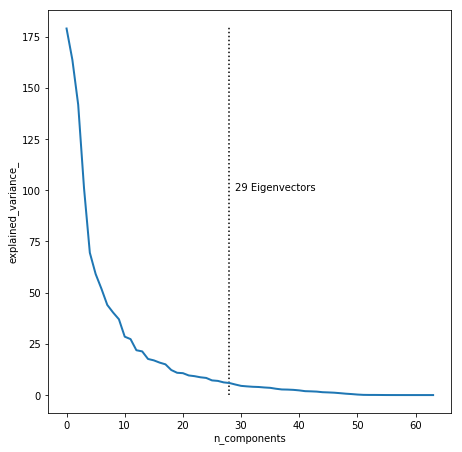

In [413]:
# Your code goes here
pca = PCA(n_components=digits.data.shape[1])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')


#Find 95% variance point - cumulative sum of explained variances.
#Finds lowest (closest point to 0.95) difference, gives us the index of the last value before 95%.
index = np.abs(0.95-np.cumsum(pca.explained_variance_ratio_)).argmin()
#add 1 to go over 95%.
index +=1
print(index)

plt.vlines(index, 0, 180, linestyle="dotted")
plt.annotate("29 Eigenvectors", xy=(29,100))

As shown, 29 eigenvectors can adequately cover 95% of our data's variance. This reconfirms the previous hypothesis that only a few features will be important. 

### ========== Question 2.3 --- [8 marks] ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

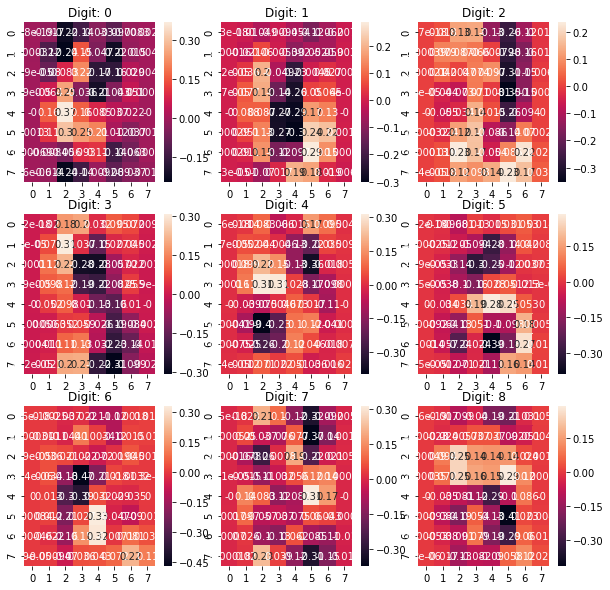

In [414]:
square_digit= np.empty((9,8,8))

for i in xrange(9):
    square_std[i,:,:] = pca.components_[i].reshape((8,8))

fig,axs = plt.subplots(3, 3, figsize=(10,10))
for ax,i in zip(axs.flat, range(9)):
    sns.heatmap(square_std[i], ax=ax, annot=True)
    ax.set_title("Digit: {}".format(i))

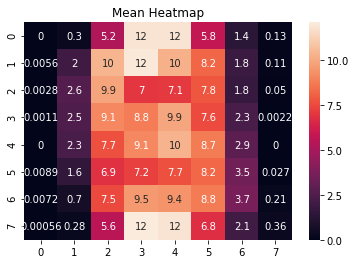

In [415]:
mean = pca.mean_.reshape((8,8))
ax = sns.heatmap(mean, annot=True)
ax.set_title('Mean Heatmap')

### ========== Question 2.4 --- [10 marks] ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

In [416]:
pca_space = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
components = pca.components_

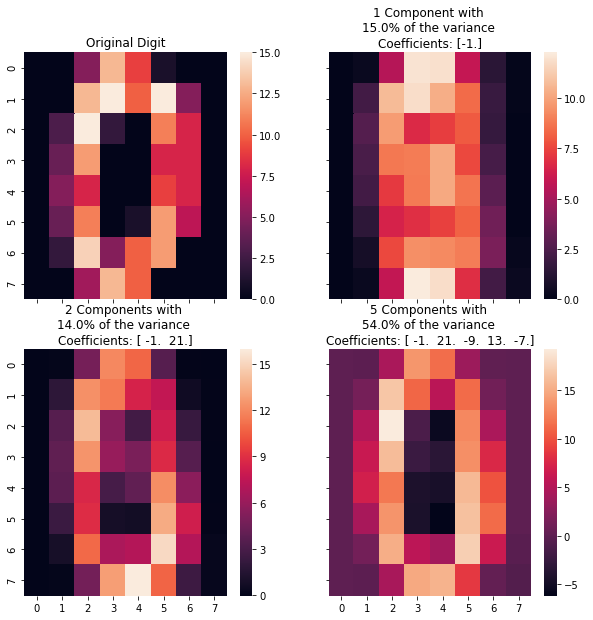

In [417]:
f, axs = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)
sns.heatmap(digits.data[0].reshape((8,8)),ax=axs[0][0])
axs[0][0].set_title('Original Digit')

#1 Component
digit = pca.mean_
digit += pca_space[0]*components[0]

coeff = np.zeros(1)
coeff[0] = int(pca_space[0])

digit = digit.reshape((8,8))
sns.heatmap(digit,ax=axs[0][1])
axs[0][1].set_title("1 Component with \n{}% of the variance \nCoefficients: {}"
                    .format(100*round((np.cumsum(pca.explained_variance_ratio_)[0]),2), coeff))

#2 Components
digit = pca.mean_
coeff = np.zeros(2)
for i in xrange(2):
    digit += pca_space[i]*components[i]
    coeff[i] = int(pca_space[i])
digit = digit.reshape((8,8))
sns.heatmap(digit,ax=axs[1][0])
axs[1][0].set_title("2 Components with \n{}% of the variance \nCoefficients: {}"
                    .format(100*round(np.cumsum((pca.explained_variance_ratio_)[1]),2), coeff))

#5 Components
digit = pca.mean_
coeff = np.zeros(5)
for i in xrange(5):
    digit += pca_space[i]*components[i]
    coeff[i] = int(pca_space[i])
digit = digit.reshape((8,8))
sns.heatmap(digit,ax=axs[1][1])
axs[1][1].set_title("5 Components with \n{}% of the variance \nCoefficients: {}"
                    .format(100*round((np.cumsum(pca.explained_variance_ratio_)[4]),2), coeff))

Increasing the number of Principal Components allows us to approximate our original digit more and more. This is logical, as we increase our covered variance our represented digit becomes less noisy. 

### ========== Question 2.5 --- [14 marks] ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved when we used PCA, but the other did not!

In [418]:
#Original Data
digit_data = digits.data
#Transformed Data
pca_digit_data = pca.fit_transform(digits.data)

kf = KFold(digit_data.shape[0], n_folds=5, shuffle=True, random_state=42)

lin1 = SVC(kernel="linear", shrinking=False, random_state=42)
lin2 = SVC(kernel="linear", shrinking=False, random_state=42)
gnb1 = GaussianNB()
gnb2 = GaussianNB()

In [419]:
accuracies=[]
temp = zip([lin1, lin2, gnb1, gnb2], [(digit_data, digits.target),(pca_digit_data, digits.target),(digit_data, digits.target),(pca_digit_data, digits.target)])
for (clf, data) in temp:
    clf.fit(data[0],data[1])
    temp=[]
    for train_index, test_index in kf:
        X_train, X_test = data[0][train_index], data[0][test_index]
        y_train, y_test = data[1][train_index], data[1][test_index]
        clf.fit(X_train, y_train)
        temp.append(clf.score(X_test, y_test))
    accuracies.append(np.mean(temp))

In [420]:
print("Classification Accuracies:")
print("SVC Linear, no transformed data: %.3f"%accuracies[0])
print("SVC Linear, pca transformed data: %.3f"%accuracies[1])
print("GNB, no transformed data: %.3f"%accuracies[2])
print("GNB, pca transformed data: %.3f"%accuracies[3])

Classification Accuracies:
SVC Linear, no transformed data: 0.975
SVC Linear, pca transformed data: 0.975
GNB, no transformed data: 0.839
GNB, pca transformed data: 0.881


As we can see, the gaussian naive bayes classifier was the only one that increased after our principal component transformation. The Gaussian Naive Bayes assumption is the independence assumption, and it considers all features equally important. Our PCA allows it to focus more on the features that actually matter. 

On the other hand, SVM's predetermine feature importance, so a further transformation does not increase its classification rate.